In [1]:
import os
os.chdir('../')
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import notebooks.config as experim_cfg
from src.visualization.plot_utils import get_comparison_plots

In [2]:
MORTALITY_INDICATORS = ['excess_mortality', 'new_deaths_smoothed_per_million']

In [3]:
covid_df_for_DID_path = Path(
    'data',
    'interim',
    f'covid_df_for_DID_({experim_cfg.MORTALITY_INDICATOR}).csv',
)
covid_df_for_DID = pd.read_csv(covid_df_for_DID_path)
covid_df_for_DID['date'] = pd.to_datetime(covid_df_for_DID['date'])

In [4]:
similar_countries_dfs = {}
for indicator in MORTALITY_INDICATORS:
    path = Path(
        'data',
        'processed',
        f'most_similar_countries(CorrSD-{indicator}).csv',
    )
    similar_countries_dfs[indicator] = pd.read_csv(path)
    similar_countries_dfs[f'{indicator}_similar_countires'] = similar_countries_dfs[indicator]['iso_codes']
    
    countries_stats_path = Path(
        'data',
        'interim',
        f'all_countries_stats({indicator}).csv',
    )
    similar_countries_dfs[f'{indicator}_all_countries_stats'] = pd.read_csv(countries_stats_path)

In [5]:
indicator = 'excess_mortality'
similar_countries_dfs[f'{indicator}_similar_countires']

0     AUT_BGR
1     AUT_ROU
2     AUT_SVN
3     AZE_ZAF
4     BGR_GRC
5     BGR_POL
6     BGR_ROU
7     BGR_SRB
8     CZE_POL
9     ITA_CHE
10    ITA_GBR
11    POL_SRB
Name: iso_codes, dtype: object

In [6]:
indicator = 'new_deaths_smoothed_per_million'
similar_countries_dfs[f'{indicator}_similar_countires']

0     AUT_BGR
1     AUT_CZE
2     AUT_GRC
3     AUT_POL
4     AUT_SRB
5     AUT_SVN
6     AZE_IRN
7     BGR_GRC
8     BGR_POL
9     CZE_GRC
10    CZE_SRB
11    GRC_POL
12    GRC_SRB
13    ITA_CHE
14    ITA_GBR
15    KAZ_KGZ
16    POL_SRB
Name: iso_codes, dtype: object

In [7]:
in_both_mortalities = (
    set(similar_countries_dfs['new_deaths_smoothed_per_million_similar_countires']) &
    set(similar_countries_dfs[f'excess_mortality_similar_countires'])
)

In [8]:
in_both_mortalities

{'AUT_BGR', 'AUT_SVN', 'BGR_GRC', 'BGR_POL', 'ITA_CHE', 'ITA_GBR', 'POL_SRB'}

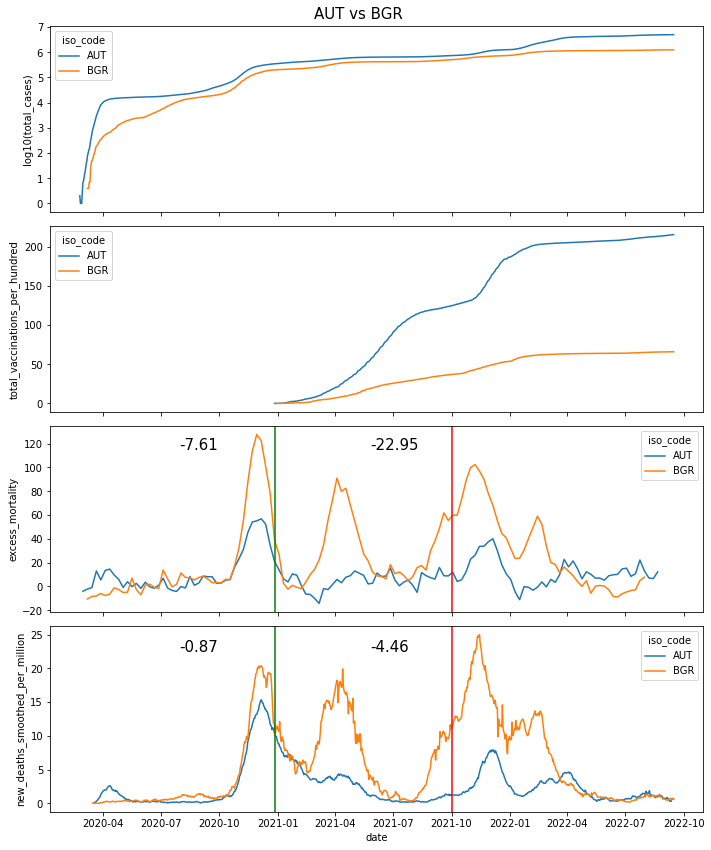

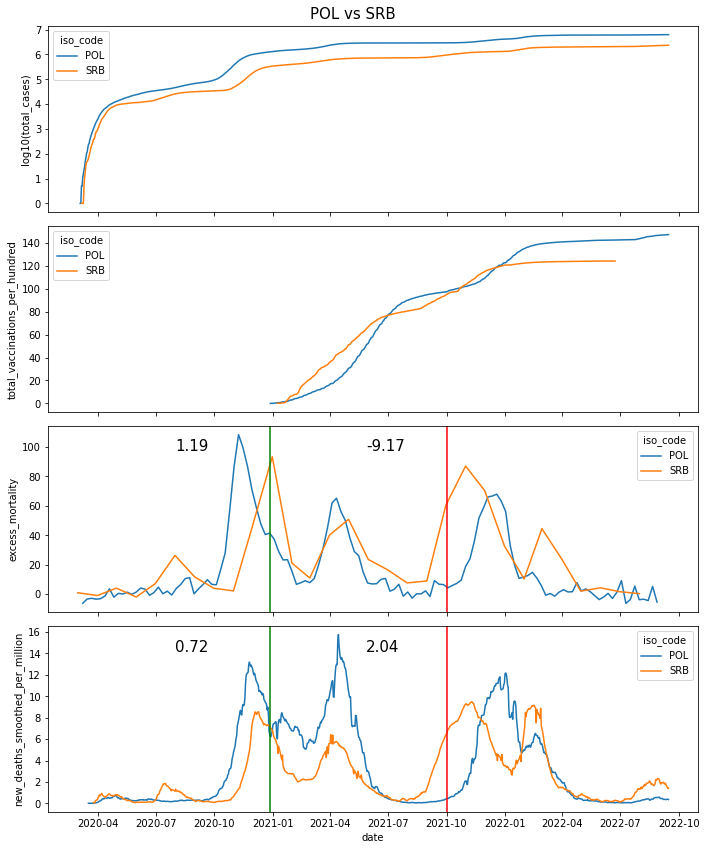

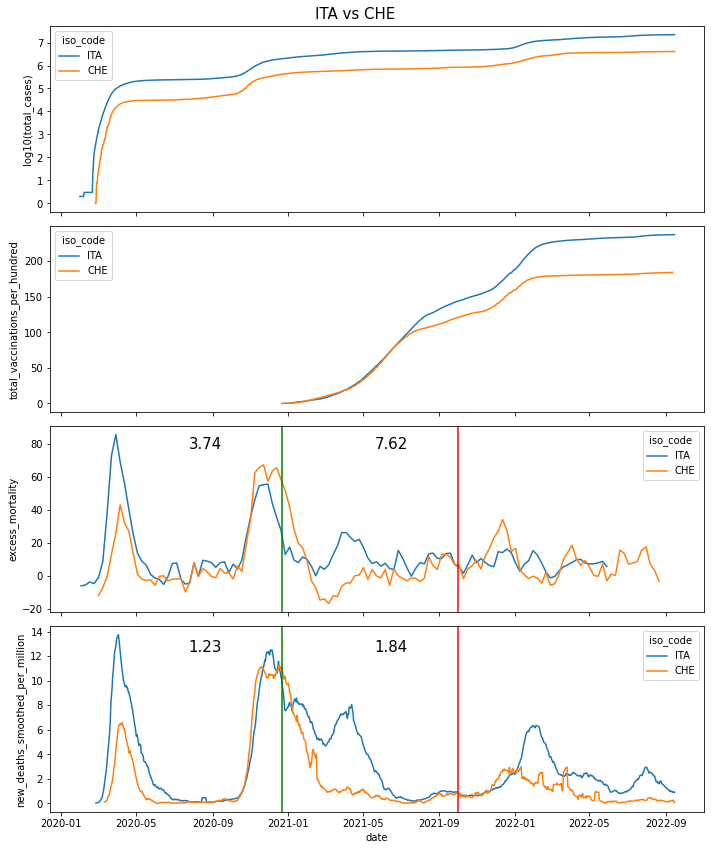

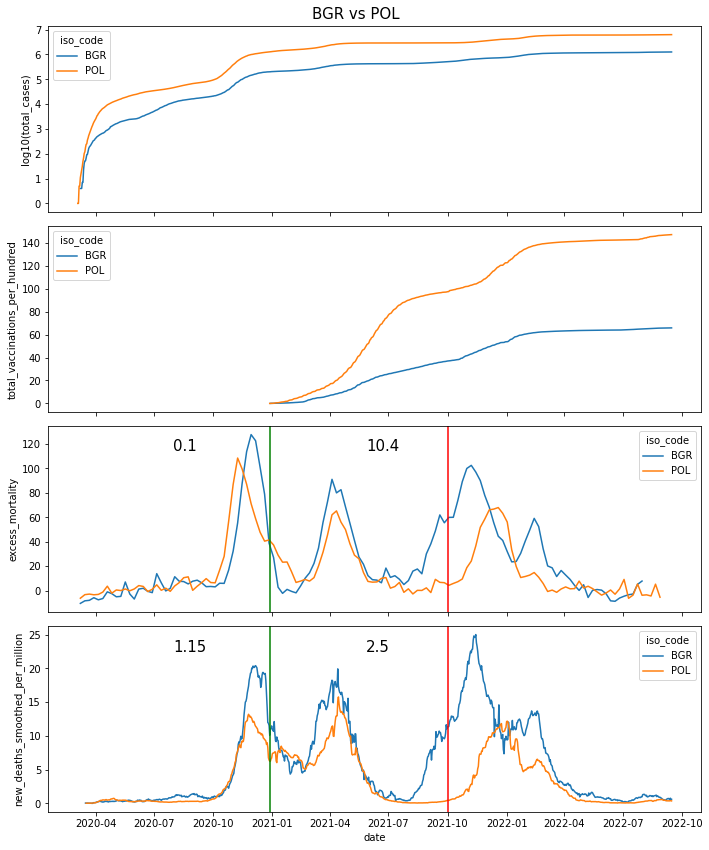

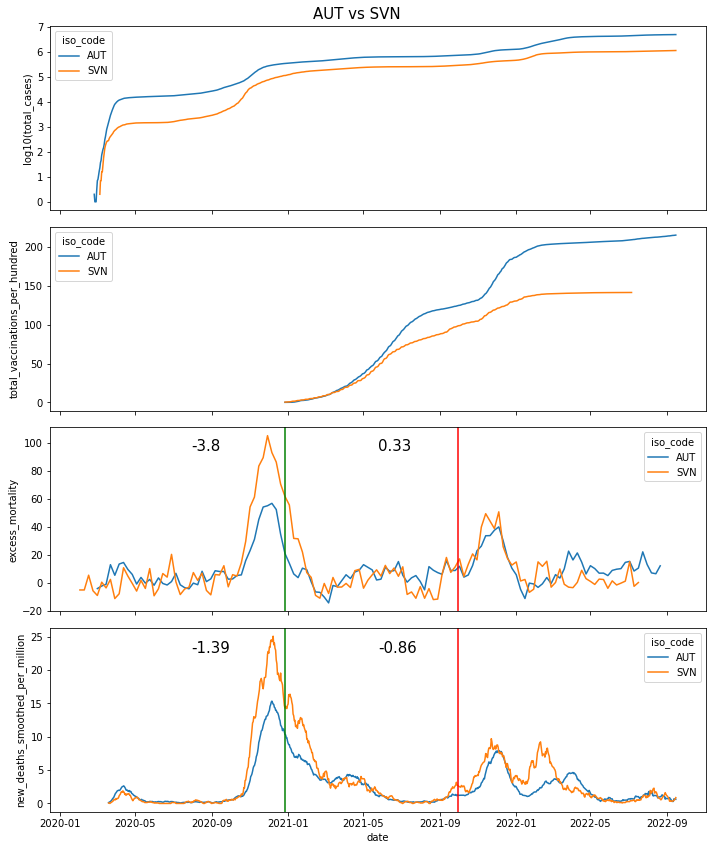

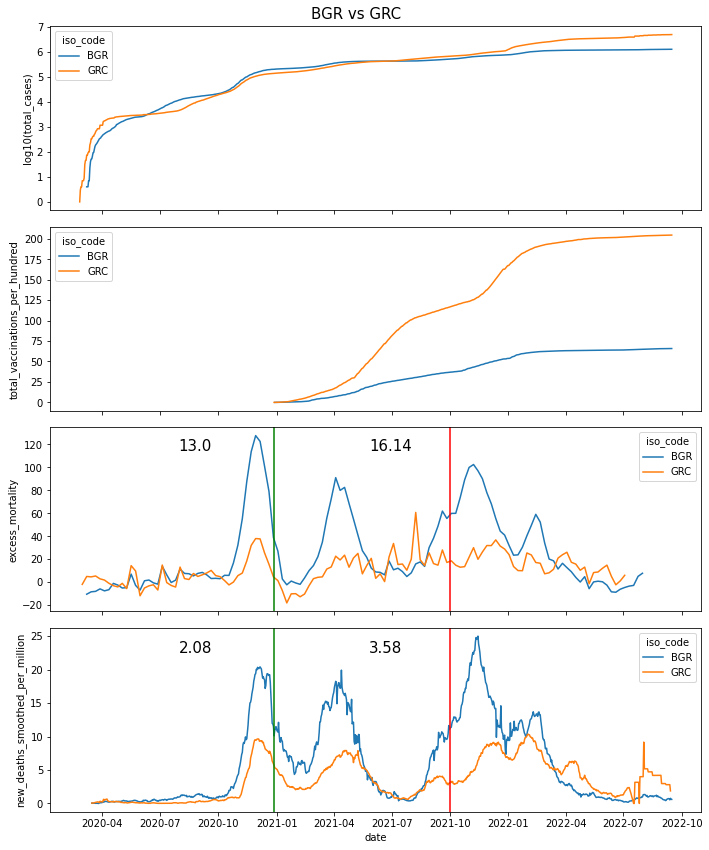

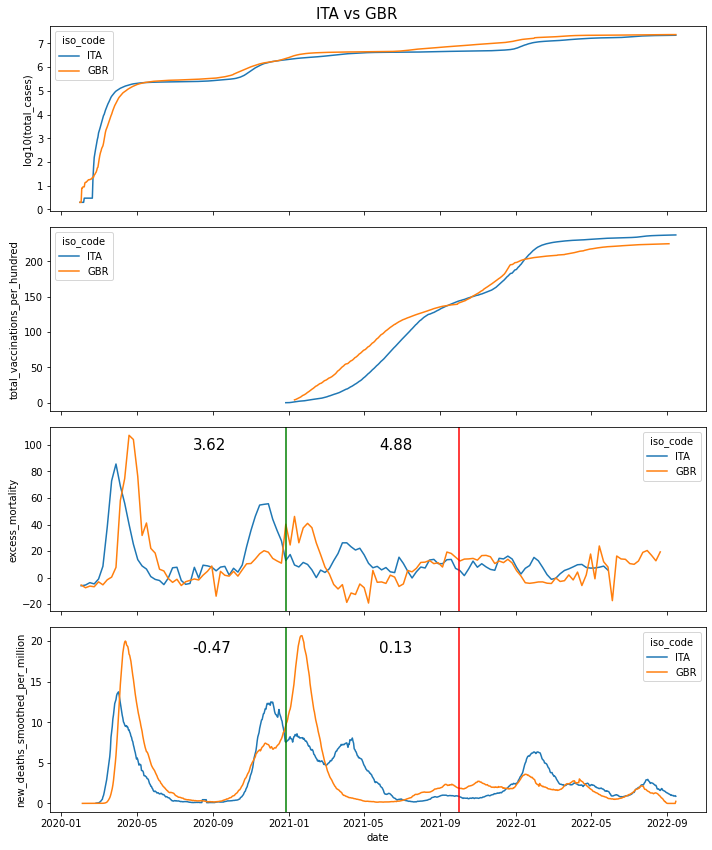

In [9]:
for iso_codes in in_both_mortalities:
    iso_code_1, iso_code_2 = iso_codes.split('_')
    get_comparison_plots(
        covid_df=covid_df_for_DID,
        iso_code_1=iso_code_1,
        iso_code_2=iso_code_2,
        vaccination_indicator=experim_cfg.VACCINATION_INDICATOR,
        mort_indicators=MORTALITY_INDICATORS,
        similar_countries_dfs=similar_countries_dfs,
        save_plot=False,
    )

In [10]:
similar_countries_dfs[f'excess_mortality']['DID_EM_AV-BV']

0    -13.286953
1     -6.277212
2      5.019207
3     -9.664634
4      2.419262
5     14.122803
6      7.009741
7      1.159914
8      1.609094
9      0.040137
10    -1.129811
11   -12.962889
Name: DID_EM_AV-BV, dtype: float64

In [11]:
covid_df_for_DID['vac_start_date']

0        2021-01-10
1        2021-01-10
2        2021-01-10
3        2021-01-10
4        2021-01-10
            ...    
62113    2020-12-13
62114    2020-12-13
62115    2020-12-13
62116    2020-12-13
62117    2020-12-13
Name: vac_start_date, Length: 62118, dtype: object

In [12]:
similar_countries_dfs[f'excess_mortality'].columns

Index(['iso_code_1', 'iso_code_2', 'delta_covid_start_date',
       'delta_vac_start_date', 'same_cluster', 'same_corr_quadrant',
       'same_continent', 'delta_n_monotonic_region', 'delta_mean_lambda',
       'delta_mean_vac_rate', 'delta_first_lambda_lt_0.02',
       'delta_days_to_10%', 'delta_days_to_25%', 'delta_days_to_50%',
       'max_NCSPM_corr_lag', 'max_NCSPM_corr', 'max_EM_corr_lag',
       'max_EM_corr', 'DID_EM_AV-BV', 'Vac_effect_EM_AV-BV',
       'VacRate_effect_EM_AV-BV', 'DID_EM_AV_BDS-BV',
       'Vac_effect_EM_AV_BDS-BV', 'VacRate_effect_EM_AV_BDS-BV',
       'DID_10%_vac-90d_BV', 'Vac_effect_10%_vac-90d_BV',
       'VacRate_effect_10%_vac-90d_BV', 'DID_25%_vac-90d_BV',
       'Vac_effect_25%_vac-90d_BV', 'VacRate_effect_25%_vac-90d_BV',
       'DID_10%_vac-120d_BV', 'Vac_effect_10%_vac-120d_BV',
       'VacRate_effect_10%_vac-120d_BV', 'DID_25%_vac-120d_BV',
       'Vac_effect_25%_vac-120d_BV', 'VacRate_effect_25%_vac-120d_BV',
       'DID_10%_vac-150d_BV', 'Vac_e